In [ ]:
!pip install pandas_datareader

In [9]:
%%time
import pandas_datareader.data as web
# 第一個數據
predict_days = 6 # 用過去6天預測下一天
df = web.DataReader('2330.tw', 'yahoo', '1999-01-01', '2021-10-27')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-9:]

Wall time: 1.56 s


,Date,High,Low,Open,Close,Volume,Adj Close,TickerId,TickerName
5444,2021-10-15,600.0,586.0,592.0,600.0,53150216.0,600.0,2330,台積電
5445,2021-10-18,604.0,590.0,604.0,590.0,19158568.0,590.0,2330,台積電
5446,2021-10-19,600.0,593.0,598.0,600.0,17386359.0,600.0,2330,台積電
5447,2021-10-20,604.0,597.0,603.0,598.0,16372520.0,598.0,2330,台積電
5448,2021-10-21,603.0,595.0,602.0,596.0,16169014.0,596.0,2330,台積電
5449,2021-10-22,602.0,594.0,600.0,600.0,13995403.0,600.0,2330,台積電
5450,2021-10-25,597.0,590.0,597.0,593.0,16785568.0,593.0,2330,台積電
5451,2021-10-26,600.0,593.0,595.0,599.0,19998808.0,599.0,2330,台積電
5452,2021-10-27,598.0,594.0,598.0,599.0,15090461.0,599.0,2330,台積電


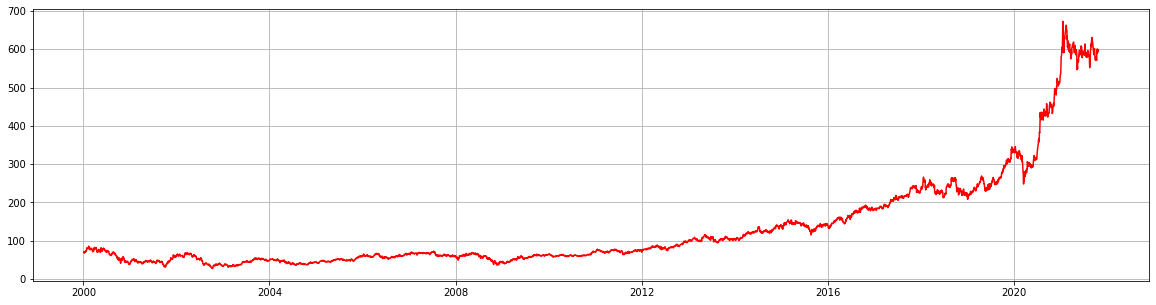

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close'], color='red')
plt.grid()
plt.show()

In [ ]:
##############################以下是解釋 X, y 資料產生方式

In [8]:
# 前面天數會有NAN
tsmc = data[['Close']][:100]
tsmc['t-5'] = tsmc.Close.shift(5)
tsmc['t-4'] = tsmc.Close.shift(4)
tsmc['t-3'] = tsmc.Close.shift(3)
tsmc['t-2'] = tsmc.Close.shift(2)
tsmc['t-1'] = tsmc.Close.shift(1)
tsmc['t-0'] = tsmc['Close']
tsmc.drop(columns='Close', inplace=True)
tsmc

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,69.649033
1,NaN,NaN,NaN,NaN,69.649033,71.214043
2,NaN,NaN,NaN,69.649033,71.214043,69.649033
3,NaN,NaN,69.649033,71.214043,69.649033,67.692490
4,NaN,69.649033,71.214043,69.649033,67.692490,70.040192
...,...,...,...,...,...,...
95,75.518280,73.561737,70.040192,72.387894,70.619270,74.876274
96,73.561737,70.040192,72.387894,70.619270,74.876274,79.634438
97,70.040192,72.387894,70.619270,74.876274,79.634438,81.638123
98,72.387894,70.619270,74.876274,79.634438,81.638123,81.136963


In [10]:
# 後面天數 會有NAN
tsmc = data[['Close']][:100]
tsmc['Close+1'] = tsmc.Close.shift(-1)
tsmc['Close+2'] = tsmc.Close.shift(-2)
tsmc['Close+3'] = tsmc.Close.shift(-3)
tsmc['Close+4'] = tsmc.Close.shift(-4)
tsmc['Close+5'] = tsmc.Close.shift(-5)
tsmc[:]

,Close,Close+1,Close+2,Close+3,Close+4,Close+5
0,69.649033,71.214043,69.649033,67.692490,70.040192,68.866341
1,71.214043,69.649033,67.692490,70.040192,68.866341,70.822884
2,69.649033,67.692490,70.040192,68.866341,70.822884,69.649033
3,67.692490,70.040192,68.866341,70.822884,69.649033,71.214043
4,70.040192,68.866341,70.822884,69.649033,71.214043,73.170578
...,...,...,...,...,...,...
95,74.876274,79.634438,81.638123,81.136963,79.133751,NaN
96,79.634438,81.638123,81.136963,79.133751,NaN,NaN
97,81.638123,81.136963,79.133751,NaN,NaN,NaN
98,81.136963,79.133751,NaN,NaN,NaN,NaN


In [11]:
# 樣本SAMPLE
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-5'] = df.t.shift(5)
df['t-4'] = df.t.shift(4)
df['t-3'] = df.t.shift(3)
df['t-2'] = df.t.shift(2)
df['t-1'] = df.t.shift(1)
df['t-0'] = df['t']
df.drop(columns='t', inplace=True)
df

,t-5,t-4,t-3,t-2,t-1,t-0
0,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0.0,1
2,NaN,NaN,NaN,0.0,1.0,2
3,NaN,NaN,0.0,1.0,2.0,3
4,NaN,0.0,1.0,2.0,3.0,4
5,0.0,1.0,2.0,3.0,4.0,5
6,1.0,2.0,3.0,4.0,5.0,6
7,2.0,3.0,4.0,5.0,6.0,7
8,3.0,4.0,5.0,6.0,7.0,8
9,4.0,5.0,6.0,7.0,8.0,9


In [12]:
# 樣本變更台積電數據 製作成前五天預測下一天 

from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df.t.shift(-1)
df['t+2'] = df.t.shift(-2)
df

,t,t+1,t+2
0,0,1.0,2.0
1,1,2.0,3.0
2,2,3.0,4.0
3,3,4.0,5.0
4,4,5.0,6.0
5,5,6.0,7.0
6,6,7.0,8.0
7,7,8.0,9.0
8,8,9.0,NaN
9,9,NaN,NaN


In [ ]:
##############################以上是解釋 X, y 資料產生方式

In [13]:
# 自己寫一個函數
# series_to_supervised()
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# 驗證台積電數據
# 前面幾次的數據 n_in 去預測後面幾次的數據 n_out
values = data.Close.tolist()
data2 = series_to_supervised(values, n_in=predict_days, n_out=1, dropnan=True) 
#*************優化過去幾天 預測下一天

In [14]:
data2[:10]

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,69.649033,71.214043,69.649033,67.692490,70.040192,68.866341,70.822884
7,71.214043,69.649033,67.692490,70.040192,68.866341,70.822884,69.649033
8,69.649033,67.692490,70.040192,68.866341,70.822884,69.649033,71.214043
9,67.692490,70.040192,68.866341,70.822884,69.649033,71.214043,73.170578
10,70.040192,68.866341,70.822884,69.649033,71.214043,73.170578,71.996735
11,68.866341,70.822884,69.649033,71.214043,73.170578,71.996735,71.996735
12,70.822884,69.649033,71.214043,73.170578,71.996735,71.996735,71.214043
13,69.649033,71.214043,73.170578,71.996735,71.996735,71.214043,72.779045
14,71.214043,73.170578,71.996735,71.996735,71.214043,72.779045,73.561737
15,73.170578,71.996735,71.996735,71.214043,72.779045,73.561737,75.518280


In [16]:
# 提示
# 取出 X , y
X = data2.iloc[:, [0,1,2,3,4,5]].values
y = data2.iloc[:, [-1]].values
# 花五分鐘思考
# 資料切割 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4357, 6), (4357, 1), (1090, 6), (1090, 1))

In [17]:
# 建置模型
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
print(reg.predict(X_test)[:3] )
print('-'*50)
print(y_test[:3])

[[48.70637747]
 [90.74236355]
 [61.10145721]]
--------------------------------------------------
[[49.4527359]
 [91.       ]
 [62.8560524]]


In [21]:
# 預測所有數據 ???
pre_Close = reg.predict(X)
data_plot = data[:-1*predict_days].copy() #********根據   優化過去幾天 預測下一天  而變動
data_plot['pre_Close'] = pre_Close
data_plot[-6:]

,Date,High,Low,Open,Close,Volume,Adj Close,TickerId,TickerName,pre_Close
5441,2021-10-12,575.0,564.0,570.0,575.0,26522907.0,575.0,2330,台積電,600.714284
5442,2021-10-13,575.0,570.0,572.0,571.0,18914374.0,571.0,2330,台積電,596.745979
5443,2021-10-14,579.0,573.0,579.0,573.0,13916927.0,573.0,2330,台積電,597.521568
5444,2021-10-15,600.0,586.0,592.0,600.0,53150216.0,600.0,2330,台積電,599.769906
5445,2021-10-18,604.0,590.0,604.0,590.0,19158568.0,590.0,2330,台積電,593.567919
5446,2021-10-19,600.0,593.0,598.0,600.0,17386359.0,600.0,2330,台積電,599.701195


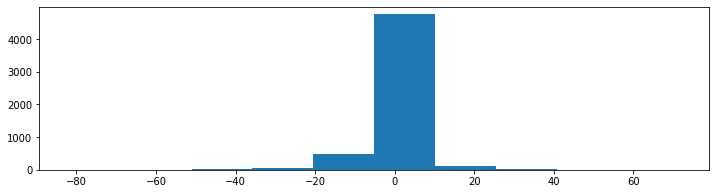

In [22]:
# 預測 與 實際的金額差異
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( data_plot.Close - data_plot.pre_Close )
plt.show()

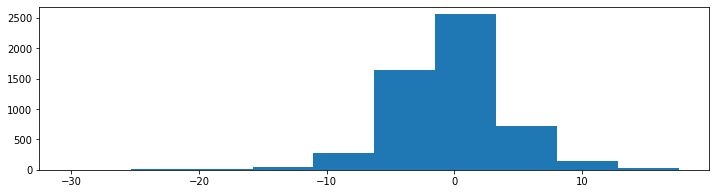

In [23]:
# 預測 與 實際的金額差異
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( (data_plot.Close - data_plot.pre_Close) / data_plot.Close * 100 )
plt.show()

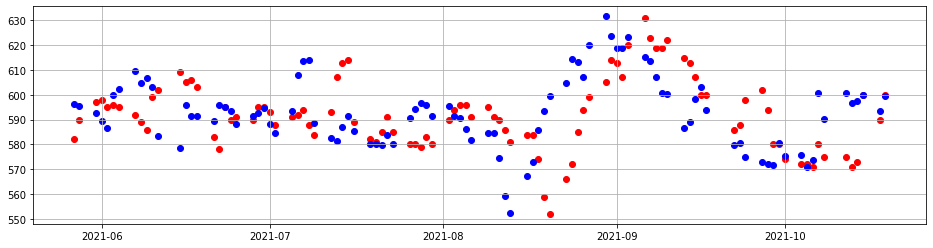

In [24]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
last_days = -100
plt.figure(figsize=(16,4))
plt.grid()
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].Close, 
            color='red')

plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].pre_Close, 
            color='blue')
plt.show()

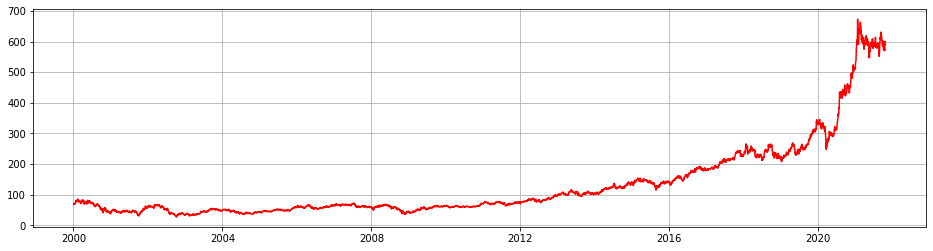

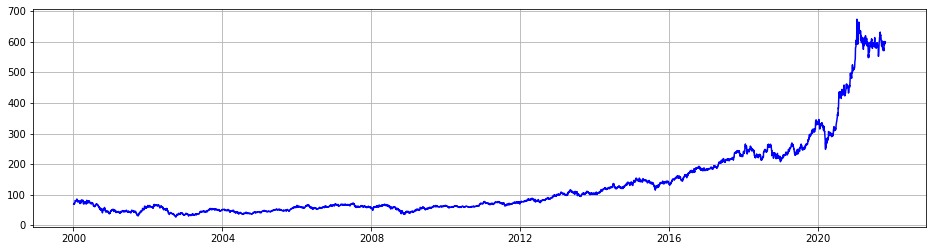

In [25]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.Close, color='red')
plt.show()

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.pre_Close, color='blue')
plt.show()

In [26]:
# mse 
# mean sqr error
# (predict - truth) ** 2 / n
# 這是預測數據

data_plot

,Date,High,Low,Open,Close,Volume,Adj Close,TickerId,TickerName,pre_Close
0,2000-01-04,69.649033,68.475182,69.649033,69.649033,2.006623e+11,36.341667,2330,台積電,68.951166
1,2000-01-05,71.214043,68.866341,69.649033,71.214043,4.024668e+11,37.158264,2330,台積電,70.989717
2,2000-01-06,71.214043,69.649033,70.822884,69.649033,1.975457e+11,36.341667,2330,台積電,69.464698
3,2000-01-07,68.475182,66.518639,67.301331,67.692490,2.352703e+11,35.320774,2330,台積電,71.391706
4,2000-01-10,70.431351,68.475182,69.649033,70.040192,2.761717e+11,36.545757,2330,台積電,73.070777
...,...,...,...,...,...,...,...,...,...,...
5442,2021-10-13,575.000000,570.000000,572.000000,571.000000,1.891437e+07,571.000000,2330,台積電,596.745979
5443,2021-10-14,579.000000,573.000000,579.000000,573.000000,1.391693e+07,573.000000,2330,台積電,597.521568
5444,2021-10-15,600.000000,586.000000,592.000000,600.000000,5.315022e+07,600.000000,2330,台積電,599.769906
5445,2021-10-18,604.000000,590.000000,604.000000,590.000000,1.915857e+07,590.000000,2330,台積電,593.567919
